# Prashant Anand Ranjan
# 21105066
---
## Importing files

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data1 = pd.read_csv('ehc.csv')
EHC = np.array(data1['Data'])
EHC = np.flipud(EHC)

data2 = pd.read_csv('Q1C.csv')
Q1C = np.array(data2['Data'])

data3 = pd.read_csv('Q3C.csv')
Q3C = np.array(data3['Data'])

data4 = pd.read_csv('Q5C.csv')
Q5C = np.array(data4['Data'])

---
## Heat generation rate

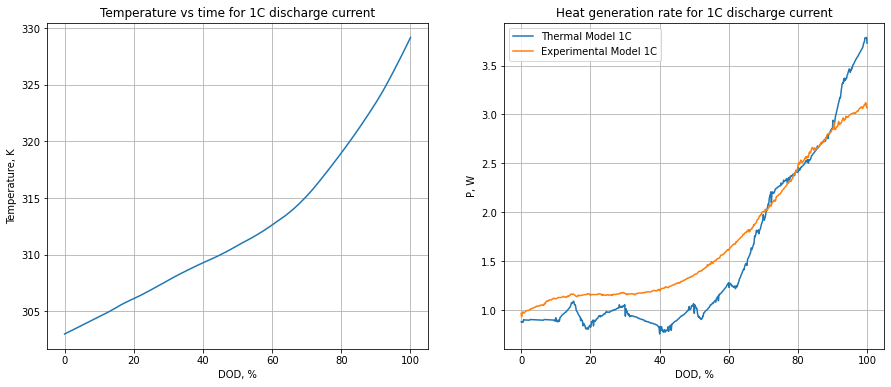

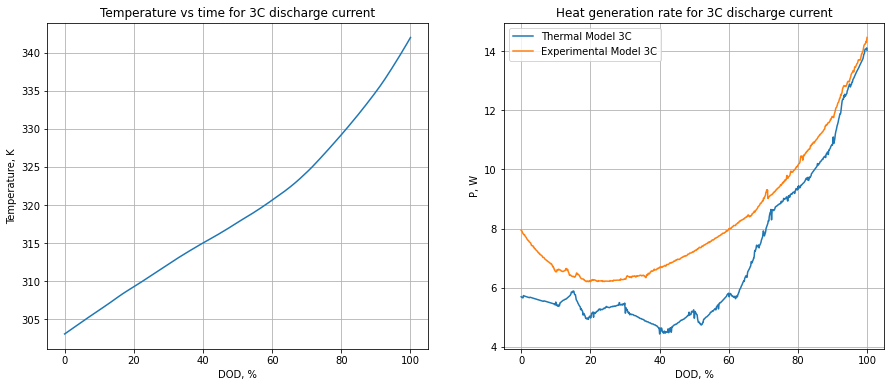

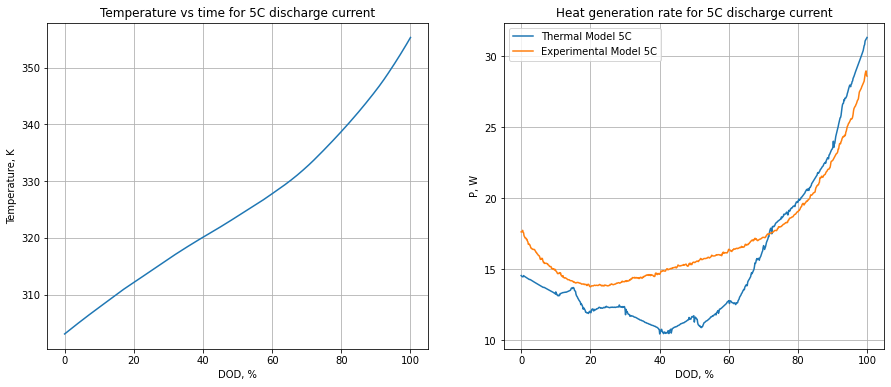

In [2]:
def heat_generation_rate(Q, N):
    M = 0.210
    cp = 1015
    I = N * -10.5
    dt = 1
    n = 3600
    m = int(n / N)
    t = np.linspace(0, 100, m) 
    T_i = 303
    T = np.zeros(m)
    for i in range(m):
        T_n = T_i + 1 / (M * cp * 1000) * (I**2 * dt * (0.0024 * T_i**2  - 1.58 * T_i + 263) + (I * EHC[N * i] * dt * T_i))
        T[i] = T_n
        T_i = T_n
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(t, T)  
    plt.xlabel('DOD, %')
    plt.ylabel('Temperature, K')
    plt.title('Temperature vs time for {}C discharge current'.format(N))
    plt.grid()

    q = np.zeros(m)
    for i in range(m):
        q[i] = I ** 2 * (.0024 * T[i]** 2 - 1.58 * T[i] + 263) / 1000 + (I * T[i] * EHC[N * i])/1000
    plt.subplot(1, 2, 2)
    plt.plot(t, q, label='Thermal Model {}C'.format(N))
    plt.plot(t, Q[0:3600:N], label='Experimental Model {}C'.format(N))
    plt.xlabel('DOD, %')
    plt.ylabel('P, W')
    plt.title('Heat generation rate for {}C discharge current'.format(N))
    plt.grid()
    plt.legend();
    return q

def err(q, Q, N):
    x = np.linspace(0, 100, int(3600 / N))
    err = abs(q - Q[0:3600:N]) / Q[0:3600:N]
    Avg_err = sum(err*100) / len(err)
    return  x, err * 100, Avg_err

q1c = heat_generation_rate(Q1C, 1)
q3c = heat_generation_rate(Q3C, 3)
q5c = heat_generation_rate(Q5C, 5)

---
## Errors between the heat generation rates measured experimentally and predicted by the heat generation model

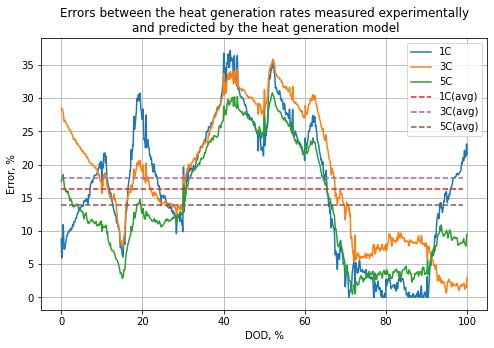

In [3]:
x1, err1, Avg_err1 = err(q1c, Q1C, 1)
x2, err2, Avg_err2 = err(q3c, Q3C, 3)
x3, err3, Avg_err3 = err(q5c, Q5C, 5)

plt.figure(figsize=(8, 5))
plt.xlabel('DOD, %')
plt.ylabel('Error, %')
plt.title('Errors between the heat generation rates measured experimentally\n and predicted by the heat generation model')
plt.plot(x1, err1, label='1C')
plt.plot(x2, err2, label='3C')
plt.plot(x3, err3, label='5C')
plt.plot(Avg_err1 * np.ones(100), '--', label='1C(avg)')
plt.plot(Avg_err2 * np.ones(100), '--', label='3C(avg)')
plt.plot(Avg_err3 * np.ones(100), '--', label='5C(avg)')
plt.legend()
plt.grid();

---
## Accumulated heat through each of the discharge processes

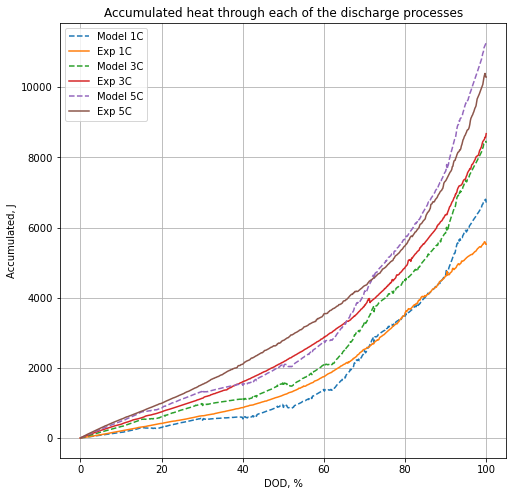

In [4]:
plt.figure(figsize=(8, 8))
t = np.linspace(0, 3600, 3600)
plt.plot(np.linspace(0, 100, 3600), q1c*t/2,'--', label='Model 1C')
plt.plot(np.linspace(0, 100, 3600), Q1C*t/2, label='Exp 1C')

t = np.linspace(0, 1200, 3600)
plt.plot(np.linspace(0, 100, 1200), q3c*t[0:3600:3]/2,'--', label='Model 3C')
plt.plot(np.linspace(0, 100, 1200), Q3C[0:3600:3]*t[0:3600:3]/2, label='Exp 3C')

t = np.linspace(0, 720, 3600)
plt.plot(np.linspace(0, 100, 720), q5c*t[0:3600:5]/2,'--', label='Model 5C')
plt.plot(np.linspace(0, 100, 720), Q5C[0:3600:5]*t[0:3600:5]/2, label='Exp 5C')
plt.grid()
plt.xlabel('DOD, %')
plt.ylabel('Accumulated, J')
plt.title('Accumulated heat through each of the discharge processes')
plt.legend();